In [213]:
import pandas as pd
import numpy as np
import sklearn.linear_model as lm
import sklearn.model_selection as ms

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import scipy.stats as scs

%load_ext autoreload
%autoreload 2

In [201]:
houses = pd.read_csv('../data/train_withdummy.csv')
min_r2 = .15
max_cov_r2 = .65
y_col = 'SalePrice'

In [215]:
def reduce_variables(df, y_col, min_r2, max_cov_r2):
    y = houses[y_col]
    score = {}
    for col in houses.columns:
        X = houses[col]
        score[col] = scs.linregress(y, X).rvalue
    score = pd.Series(score)
    abs_score = np.abs(score)
    ## ignore plot
    #plt.scatter(np.arange(abs_score.size), abs_score.sort_values())
    keep_cols = abs_score[abs_score > min_r2]
    cov_score = pd.Series()
    for col1, rval1 in keep_cols.iteritems():
        y = houses[col1]
        for col2, rval2 in keep_cols.iteritems():
            X = houses[col2]
            cov_score['{}%{}'.format(col1,col2)] = scs.linregress(y, X).rvalue
    abs_cov_score = np.abs(cov_score)
    ## ignore plot
    #plt.scatter(np.arange(abs_cov_score.size), abs_cov_score.sort_values())
    now_drop = abs_cov_score[(abs_cov_score > max_cov_r2) & (abs_cov_score != 1)]
    ## drop every other value (because they will be in pairs)
    drops = now_drop.sort_values(ascending=False).index[::2]
    drops = pd.Series(drops).apply(lambda x: x.split('%')[0])
    new_keep_cols = list(keep_cols.drop(list(drops)).index)
    new_keep_cols.append(y_col)
    return houses[new_keep_cols]

In [211]:
# nvars = reduce_variables(houses, y_col, min_r2, max_cov_r2)

['1stFlrSF', 'BedroomAbvGr', 'BsmtExposure$Gd', 'BsmtExposure$No', 'BsmtFinSF1', 'BsmtFinType1$GLQ', 'BsmtFullBath', 'BsmtQual$Ex', 'BsmtQual$Gd', 'BsmtUnfSF', 'CentralAir$Y', 'Electrical$FuseA', 'ExterQual$Ex', 'Exterior1st$MetalSd', 'Exterior1st$VinylSd', 'Exterior2nd$Wd Sdng', 'FireplaceQu$Ex', 'FireplaceQu$Gd', 'FireplaceQu$TA', 'Fireplaces', 'Foundation$BrkTil', 'FullBath', 'GarageCars', 'GarageFinish$Fin', 'GarageFinish$RFn', 'GarageFinish$Unf', 'GarageQual$TA', 'GarageType$BuiltIn', 'GarageType$Detchd', 'HalfBath', 'HeatingQC$TA', 'KitchenQual$Ex', 'KitchenQual$Fa', 'KitchenQual$TA', 'LotArea', 'LotFrontage', 'LotShape$IR1', 'MSSubClass$1-1/2 STORY FINISHED ALL AGES', 'MSSubClass$1-STORY 1945 & OLDER', 'MSZoning$RL', 'MasVnrArea', 'MasVnrType$BrkFace', 'MasVnrType$Stone', 'Neighborhood$Edwards', 'Neighborhood$IDOTRR', 'Neighborhood$NAmes', 'Neighborhood$NoRidge', 'Neighborhood$NridgHt', 'Neighborhood$OldTown', 'Neighborhood$StoneBr', 'OpenPorchSF', 'PavedDrive$N', 'RoofMatl$WdSh

In [222]:
houses = pd.read_csv('../data/train_withdummy.csv')
min_r2 = .15
max_cov_r2 = .65
y_col = 'SalePrice'

scores = {}

for value in np.linspace(.05, .7, 30):
    min_r2 = value
    df = reduce_variables(houses, y_col, min_r2, max_cov_r2)
    y = df['SalePrice']
    X = df.drop('SalePrice', axis=1)
    Xtr, Xte, ytr, yte = ms.train_test_split(X, y, train_size=.90)
    model = lm.LinearRegression(n_jobs=-1)
    model.fit(Xtr, ytr)
    scores[value] = np.abs(model.score(Xte, yte))
    

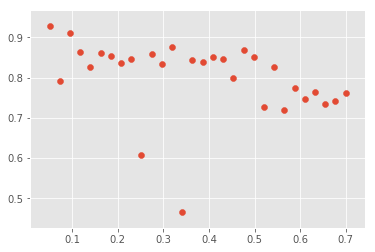

In [225]:
min_r2_scores = pd.Series(scores)
plt.scatter(min_r2_scores.index, min_r2_scores)

In [227]:
houses = pd.read_csv('../data/train_withdummy.csv')
min_r2 = .05
# max_cov_r2 = .65
y_col = 'SalePrice'

cov_scores = {}
cov_predict = {}

for value in np.linspace(.5, .75, 4):
    max_cov_r2 = value
    df = reduce_variables(houses, y_col, min_r2, max_cov_r2)
    y = df['SalePrice']
    X = df.drop('SalePrice', axis=1)
    Xtr, Xte, ytr, yte = ms.train_test_split(X, y, train_size=.80)
    model = lm.LinearRegression(n_jobs=-1)
    model.fit(Xtr, ytr)
    cov_scores[value] = np.abs(model.score(Xte, yte))
    cov_predict[value] = model.predict(Xte)
cov_scores = pd.Series(cov_scores)

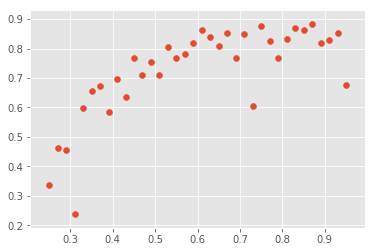

In [231]:
plt.scatter(cov_scores.index, cov_scores)

In [240]:
# predicts = pd.DataFrame(*cov_predict.items())

In [257]:
houses = pd.read_csv('../data/train_withdummy.csv')
min_r2 = .12
max_cov_r2 = .78
y_col = 'SalePrice'

df = reduce_variables(houses, y_col, min_r2, max_cov_r2)

In [258]:
df.columns.shape

(96,)

In [259]:
y = df['SalePrice']
X = df.drop('SalePrice', axis=1)
Xtr, Xte, ytr, yte = ms.train_test_split(X, y, train_size=.80)
model = lm.LinearRegression(n_jobs=-1)
model.fit(Xtr, ytr)
score = np.abs(model.score(Xte, yte))
predict  = model.predict(Xte)

In [286]:
num_cols = np.array([col for col in cols if '$' not in col])

In [288]:
num_cols

array(['1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFullBath', 'BsmtUnfSF', 'EnclosedPorch', 'Fireplaces',
       'FullBath', 'GarageArea', 'GarageYrBlt', 'HalfBath', 'KitchenAbvGr',
       'LotArea', 'LotFrontage', 'MasVnrArea', 'OpenPorchSF',
       'TotRmsAbvGrd', 'WoodDeckSF', 'YearBuilt', 'YearRemodAdd'], 
      dtype='<U13')

In [290]:
ggg = df[df.columns[0]]

In [296]:
def _app_squared(x):
    return x*x

def _app_log(x):
    return np.log(x)

def _app_sqrt(x):
    return np.sqrt(x)

def _app_cube(x):
    return x*x*x

def _app_exp(x):
    return np.exp(x)

func_dic = {'sqr': _app_squared, 'log': _app_log, 'sqrt' : _app_sqrt, 'cube': _app_cube, 'exp': _app_exp} 

In [325]:
(np.isfinite(df[col]) == False).sum():
    print('poop')

poop


In [300]:
col = num_cols[0]

df_t = df.copy()
# df_t[col].apply(func_dic['sqr'])
y = df_t['SalePrice']
X = df_t.drop('SalePrice', axis=1)
Xtr, Xte, ytr, yte = ms.train_test_split(X, y, train_size=.80)
model = lm.LinearRegression(n_jobs=-1)
model.fit(Xtr, ytr)
score = np.abs(model.score(Xte, yte))
# predict  = model.predict(Xte)

In [302]:
base_score = score

In [306]:
cd ..

/Users/travis/Documents/Education/SMU/OneDrive - Southern Methodist University/Code/ds6371_group


In [307]:
from src import pyfunctions

In [396]:
df['SalePrice'] = np.exp(df['SalePrice']) - .0001

/Users/travis/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [397]:
outs = pyfunctions.transform_numerics(df, delim='$')

/Users/travis/Documents/Education/SMU/OneDrive - Southern Methodist University/Code/ds6371_group/src/pyfunctions.py:163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [398]:
outpos = outs[outs > 0]

In [399]:
outpos

,diff,score
BsmtFinSF1$cube,0.009118,0.878112
2ndFlrSF$cube,0.007845,0.876839
KitchenAbvGr$log,0.000165,0.869159
FullBath$sqrt,0.000142,0.869136
OpenPorchSF$log,0.000075,0.869069
YearRemodAdd$cube,0.000006,0.869001
GarageYrBlt$sqr,NaN,0.868991
YearBuilt$log,NaN,0.868988
BsmtFullBath$log,NaN,0.868936
EnclosedPorch$sqrt,NaN,0.868873


In [362]:
transforms = {val.split('$')[0]: val.split('$')[1] for val in outpos.index}

In [363]:
transforms

{'1stFlrSF': 'sqrt',
 '2ndFlrSF': 'cube',
 'BedroomAbvGr': 'sqrt',
 'BsmtFinSF1': 'cube',
 'BsmtFullBath': 'log',
 'BsmtUnfSF': 'sqrt',
 'EnclosedPorch': 'sqrt',
 'Fireplaces': 'sqrt',
 'FullBath': 'sqrt',
 'GarageArea': 'log',
 'GarageYrBlt': 'sqr',
 'HalfBath': 'log',
 'KitchenAbvGr': 'log',
 'LotArea': 'log',
 'LotFrontage': 'cube',
 'MasVnrArea': 'sqr',
 'OpenPorchSF': 'log',
 'TotRmsAbvGrd': 'sqrt',
 'WoodDeckSF': 'sqrt',
 'YearBuilt': 'log',
 'YearRemodAdd': 'cube'}

In [368]:
tdf = df.copy()

In [369]:
for key, val in transforms.items():
    tdf[key] = (tdf[key]+ .00001).apply(func_dic[val])

In [389]:
df_t = tdf.copy()
# df_t[col].apply(func_dic['sqr'])
y = np.log(df_t['SalePrice'] + .0001)
X = df_t.drop('SalePrice', axis=1)
Xtr, Xte, ytr, yte = ms.train_test_split(X, y, train_size=.80)
model = lm.LinearRegression(n_jobs=-1)
model.fit(Xtr, ytr)
score = np.abs(model.score(Xte, yte))

In [402]:
score

0.87195034965375939

In [379]:
import json

In [383]:
with open('../data/custom_transforms.json', 'w') as jfile:
    json.dump(transforms, jfile)

In [384]:
with open('../data/custom_columns', 'w') as colfile:
    colfile.write('\n'.join(df.columns))

In [400]:
coefs = model.coef_

In [408]:
pd.Series(df.columns).index = coefs

RangeIndex(start=0, stop=96, step=1)

In [404]:
ploof = [True for col in df.columns if col.min() < 0]

TypeError: string indices must be integers

In [421]:
coef_frame = pd.Series(coefs[0,:])
coef_frame.index = X.columns

In [423]:
for line, val in coef_frame.items():
    print('{} -- {}'.format(line, val))

1stFlrSF -- 0.01803283475668118
2ndFlrSF -- 6.108503774274317e-11
Alley$Grvl -- 0.026346825455716292
BedroomAbvGr -- -0.02043749560078317
BldgType$1Fam -- 0.04321629783727441
BsmtCond$Fa -- -0.09482915031369324
BsmtExposure$Av -- 0.002518547385451748
BsmtExposure$Gd -- 0.0634192475818646
BsmtExposure$No -- -0.017525328527860463
BsmtFinSF1 -- -7.485042100019434e-12
BsmtFinType1$BLQ -- 0.00825324743949561
BsmtFinType1$GLQ -- 0.031507252935591805
BsmtFinType1$Rec -- 0.0065326585651782326
BsmtFullBath -- 0.0023092356812852294
BsmtQual$Ex -- 0.3193965233701003
BsmtQual$Fa -- 0.189022495045605
BsmtQual$Gd -- 0.2504471934532264
BsmtQual$TA -- 0.2104585592266932
BsmtUnfSF -- -0.0015321388749186815
CentralAir$Y -- 0.10895320440024751
Electrical$FuseA -- 0.012513532236637445
Electrical$FuseF -- 0.03041101078006026
EnclosedPorch -- 0.0008244616297035439
ExterCond$Fa -- -0.11895061889097366
ExterQual$Ex -- 0.05475171127357421
ExterQual$Gd -- 0.03742436804977661
Exterior1st$CemntBd -- -0.0469200743

In [430]:
pwd

'/Users/travis/Documents/Education/SMU/OneDrive - Southern Methodist University/Code/ds6371_group'

In [432]:
hs = pd.read_csv('train.csv')
houses['SaleType'].value_counts()

KeyError: 'SaleType'

In [411]:
for dat in df_t.columns:
    print(dat)

1stFlrSF
2ndFlrSF
Alley$Grvl
BedroomAbvGr
BldgType$1Fam
BsmtCond$Fa
BsmtExposure$Av
BsmtExposure$Gd
BsmtExposure$No
BsmtFinSF1
BsmtFinType1$BLQ
BsmtFinType1$GLQ
BsmtFinType1$Rec
BsmtFullBath
BsmtQual$Ex
BsmtQual$Fa
BsmtQual$Gd
BsmtQual$TA
BsmtUnfSF
CentralAir$Y
Electrical$FuseA
Electrical$FuseF
EnclosedPorch
ExterCond$Fa
ExterQual$Ex
ExterQual$Gd
Exterior1st$CemntBd
Exterior1st$MetalSd
Exterior1st$VinylSd
Exterior2nd$Wd Sdng
Fence$MnPrv
FireplaceQu$Ex
FireplaceQu$Gd
FireplaceQu$TA
Fireplaces
Foundation$BrkTil
Foundation$PConc
FullBath
GarageArea
GarageCond$Fa
GarageFinish$Fin
GarageFinish$RFn
GarageFinish$Unf
GarageQual$Fa
GarageQual$TA
GarageType$Attchd
GarageType$BuiltIn
GarageType$Detchd
GarageYrBlt
HalfBath
HeatingQC$Ex
HeatingQC$Fa
HeatingQC$Gd
HeatingQC$TA
KitchenAbvGr
KitchenQual$Ex
KitchenQual$Fa
KitchenQual$Gd
LandContour$HLS
LotArea
LotConfig$CulDSac
LotFrontage
LotShape$IR2
LotShape$Reg
MSSubClass$1-1/2 STORY FINISHED ALL AGES
MSSubClass$1-STORY 1945 & OLDER
MSSubClass$2-STO

In [428]:
df['SalePrice'].median()

SalePrice    163000.0
SalePrice    163000.0
dtype: float64

In [ ]:
with open('')

In [ ]:
model.predict()